# Variational Autoencoder

In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load pallets library from project root
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from pallets import (
    images as I,
    datasets as DS,
    models as M,
    logging as L
)


# Settings

In [3]:
SAVE_NAME = 'vae'

In [4]:
USE_GPU = True
LOG_LEVEL = 'INFO'
LABELS_FILE = 'pallets_labels.json'

TEST_SIZE = 1000
EPOCHS = 50
LR = 1e-03
BATCH_SIZE = 32

In [5]:
# To GPU, or not to GPU
device = M.get_device(require_gpu=USE_GPU)

# Logging
L.init_logger(level=LOG_LEVEL, notebook=True)


<Logger pallets (INFO)>

# Dataset

In [6]:
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.OneHotCPunksDataset(
    mapper, labels_file=LABELS_FILE, test_size=TEST_SIZE
)

# Uncomment to put entire dataset in GPU RAM
# dataset = DS.FastOneHotCPunksDataset(
#     device, mapper, labels_file=LABELS_FILE, test_size=TEST_SIZE
# )

In [7]:
train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=test_sampler)

# Training

In [8]:
input_dim = 222 * 24 * 24
hidden_dim = 128
latent_dim = 32

model = M.vae.VAE(input_dim, hidden_dim, latent_dim)
criterion = M.vae.Loss()

train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=LR, epochs=EPOCHS
)

M.save(SAVE_NAME, model, train_losses, test_losses)

INFO | model: pallets.models.vae.VAE
INFO | criterion: pallets.models.vae.Loss
INFO | learn rate: 0.001
INFO | epochs: 50
INFO | epoch 1 (  0%) loss: 1433884.750000
INFO | epoch 1 ( 35%) loss: 153950.791045
INFO | epoch 1 ( 70%) loss: 84249.829000
INFO | epoch 1 (100%) loss: 63463.940259
INFO | epoch 1 (test) loss: 10413.646179
INFO | epoch 2 (  0%) loss: 10446.083984
INFO | epoch 2 ( 35%) loss: 9579.232876
INFO | epoch 2 ( 70%) loss: 8845.071619
INFO | epoch 2 (100%) loss: 8371.413679
INFO | epoch 2 (test) loss: 6800.322433
INFO | epoch 3 (  0%) loss: 6694.165527
INFO | epoch 3 ( 35%) loss: 6510.715042
INFO | epoch 3 ( 70%) loss: 6219.638125
INFO | epoch 3 (100%) loss: 5975.719047
INFO | epoch 3 (test) loss: 5089.602184
INFO | epoch 4 (  0%) loss: 5013.729980
INFO | epoch 4 ( 35%) loss: 5074.578299
INFO | epoch 4 ( 70%) loss: 4894.161738
INFO | epoch 4 (100%) loss: 4783.572460
INFO | epoch 4 (test) loss: 4289.923733
INFO | epoch 5 (  0%) loss: 4312.207031
INFO | epoch 5 ( 35%) loss: 4

# Results

In [18]:
# Generate new image

z = torch.randn(1, latent_dim).to(device)
with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0].view(222, 24, 24)
print(decoded_one_hot.shape)


torch.Size([1, 127872])
torch.Size([222, 24, 24])


torch.Size([4, 24, 24])


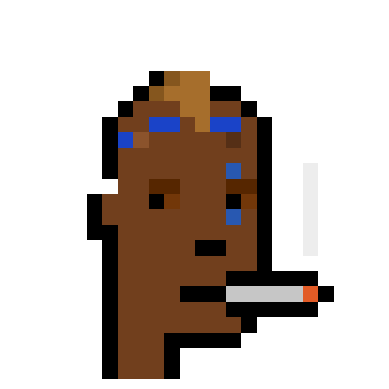

In [20]:
decoded = DS.one_hot_to_rgba(decoded_one_hot, dataset.mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


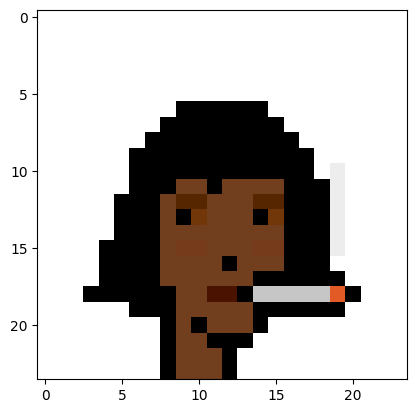

In [21]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



torch.Size([1, 222, 24, 24])


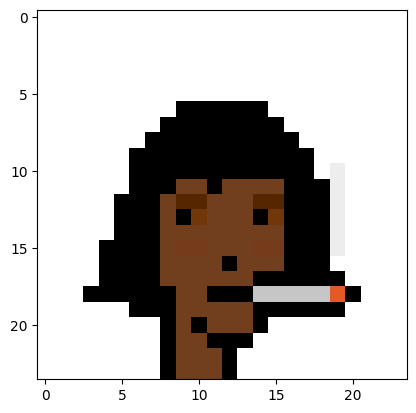

In [22]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, dataset.mapper)
p = p.unsqueeze(0)
p = p.to(device)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p)
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, dataset.mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


## Losses

<function matplotlib.pyplot.show(close=None, block=None)>

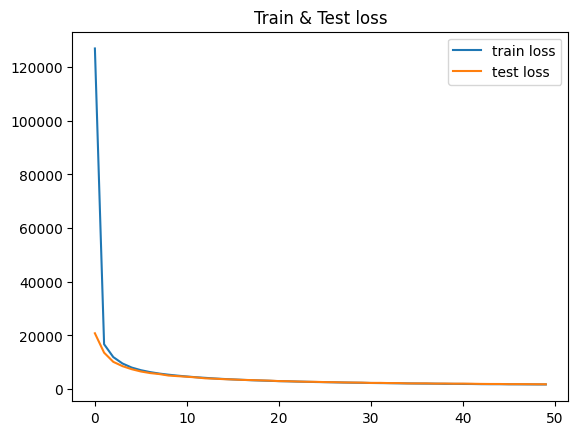

In [23]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show


In [24]:
train_losses


[126927.88051827073,
 16742.827357082504,
 11951.438093036624,
 9567.14491910461,
 8051.486634599401,
 7075.951176203735,
 6362.063670489805,
 5812.48732979416,
 5390.83408480164,
 5034.615869400349,
 4722.11482141373,
 4445.016842673011,
 4217.04042691711,
 3989.5470520452404,
 3800.9068209600787,
 3635.643458806031,
 3486.769271525931,
 3333.2288158227366,
 3221.694925511137,
 3113.8114764707307,
 2996.3405662157857,
 2925.6673577491274,
 2827.6752265226755,
 2755.5537152662346,
 2667.3604853203956,
 2621.1209920247397,
 2548.170212549521,
 2483.2601106251386,
 2419.251388333368,
 2377.058158712184,
 2311.9863410029852,
 2271.4875090037676,
 2240.51100515812,
 2181.3129893634336,
 2148.6747808794603,
 2102.6348106438386,
 2075.055957550698,
 2048.650783674091,
 1990.9111812943263,
 1979.0714631858448,
 1944.4302199343417,
 1928.0714518229167,
 1872.6761662909325,
 1858.3744517657774,
 1857.8319327712904,
 1817.7861746930062,
 1804.6684255397065,
 1782.162344533501,
 1761.61882148905,

In [25]:
test_losses


[20827.292358398438,
 13600.64486694336,
 10179.204368591309,
 8579.847465515137,
 7443.721004486084,
 6588.629909515381,
 6002.825977325439,
 5632.316352844238,
 5079.162506103516,
 4851.551643371582,
 4634.1955642700195,
 4387.78889465332,
 4041.831745147705,
 3917.7000770568848,
 3734.3112144470215,
 3612.5853691101074,
 3464.229600906372,
 3385.2233963012695,
 3279.814291000366,
 3176.2589683532715,
 3010.4955520629883,
 2958.824716567993,
 2858.5850734710693,
 2766.4820594787598,
 2733.4253997802734,
 2631.5180168151855,
 2597.1623935699463,
 2512.5934104919434,
 2473.523687362671,
 2437.66322517395,
 2322.1422271728516,
 2346.3583240509033,
 2265.760326385498,
 2267.3131217956543,
 2152.2615642547607,
 2153.804027557373,
 2155.486978530884,
 2075.53014087677,
 2104.42498588562,
 2043.9176807403564,
 2063.7301750183105,
 2013.7992401123047,
 1958.315393447876,
 1930.8094882965088,
 1926.895191192627,
 1872.7485542297363,
 1880.7376441955566,
 1866.8395156860352,
 1839.352293968200